In [144]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('base_gastos_cartao.csv')
colunas = ["Gastos_Cartao", "Idade","Renda", "Impostos"]
df[colunas].head(50)

,Gastos_Cartao,Idade,Renda,Impostos
0,510,35,1120,60
1,490,30,1120,60
2,470,32,1040,60
3,460,31,1200,60
4,500,36,1120,60
5,540,39,1360,120
6,460,34,1120,90
7,500,34,1200,60
8,440,29,1120,60
9,490,31,1200,30


In [145]:
df.isnull().any()

Gastos_Cartao    False
Idade            False
Renda            False
Impostos         False
Segmento         False
dtype: bool

In [146]:
(df  == 0).any()

Gastos_Cartao    False
Idade            False
Renda            False
Impostos         False
Segmento         False
dtype: bool

In [147]:
df.shape

(150, 5)

In [148]:
import seaborn as sb
#sb.pairplot(df.dropna(), size=5,vars=colunas,kind='scatter')

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
df_train, df_val = train_test_split(df, test_size=0.3,random_state=432)

In [151]:
print(df_train.shape)
print(df_val.shape)

(105, 5)
(45, 5)


In [152]:
from sklearn.cluster import KMeans

225770600.91428572
32800627.928060416
12630833.71872082
6457239.472222221
4633330.994444445
3112955.3191622104
2404475.1954248366
1914730.0565359476
1561139.6093137255
1368697.0221925136


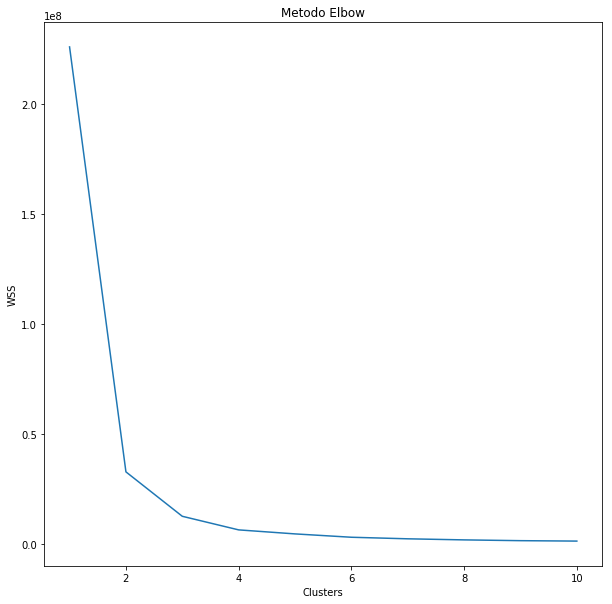

In [153]:
import matplotlib.pyplot as plt

wcss = []
 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=432, n_init=100, init='k-means++')
    kmeans.fit(df_train[colunas])
    wcss.append(kmeans.inertia_)  
    print(kmeans.inertia_)
    
plt.figure(figsize=(10,10))    
plt.plot(range(1, 11), wcss)
plt.title('Metodo Elbow')
plt.xlabel('Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [154]:
km = KMeans(n_clusters=3, n_init=100, random_state=432, init='k-means++')

In [155]:
km.fit(df_train[colunas])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=100, n_jobs=1, precompute_distances='auto',
    random_state=432, tol=0.0001, verbose=0)

In [156]:
labels = km.predict(df_train[colunas])
print(labels)

[0 1 1 1 1 0 0 1 2 1 2 2 0 0 2 1 2 2 1 1 0 2 0 2 1 1 1 1 2 0 2 2 2 1 2 2 1
 2 2 1 2 1 0 0 2 0 1 2 0 0 2 1 0 0 2 1 0 0 1 0 0 1 0 0 0 1 2 1 1 2 2 1 1 1
 0 0 2 0 0 1 1 0 0 2 2 0 2 0 1 1 1 0 2 2 1 2 2 0 1 0 1 0 2 2 2]


In [157]:
centers = km.cluster_centers_
print(centers)

[[ 587.35294118   27.73529412 3416.47058824  411.17647059]
 [ 501.66666667   34.58333333 1155.55555556   73.33333333]
 [ 670.28571429   29.57142857 4505.14285714  594.85714286]]


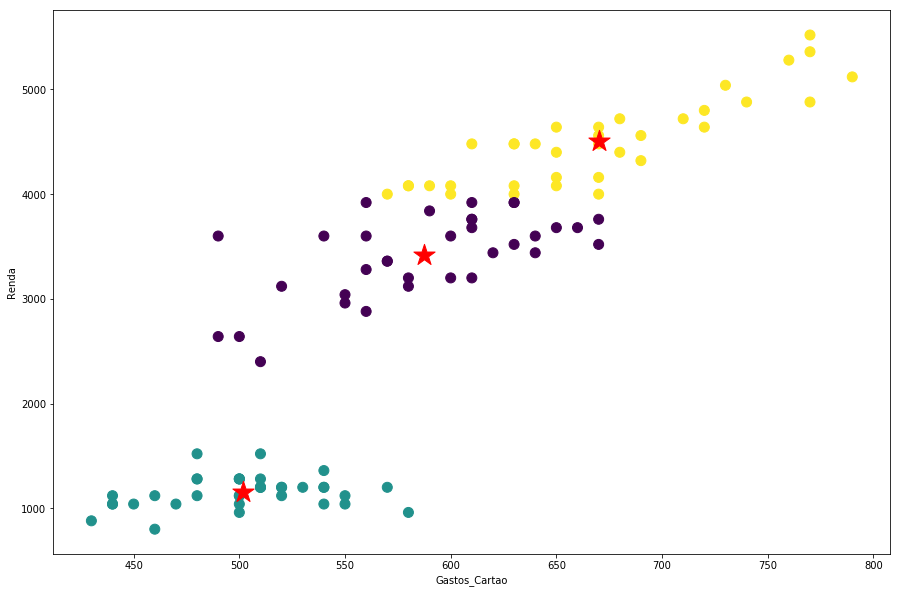

In [158]:
f1 = df_train['Gastos_Cartao'].values
f2 = df_train['Renda'].values

plt.figure(figsize=(15,10))
plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 2], marker='*', c="red", s=500)
plt.xlabel('Gastos_Cartao')
plt.ylabel('Renda')

plt.show()

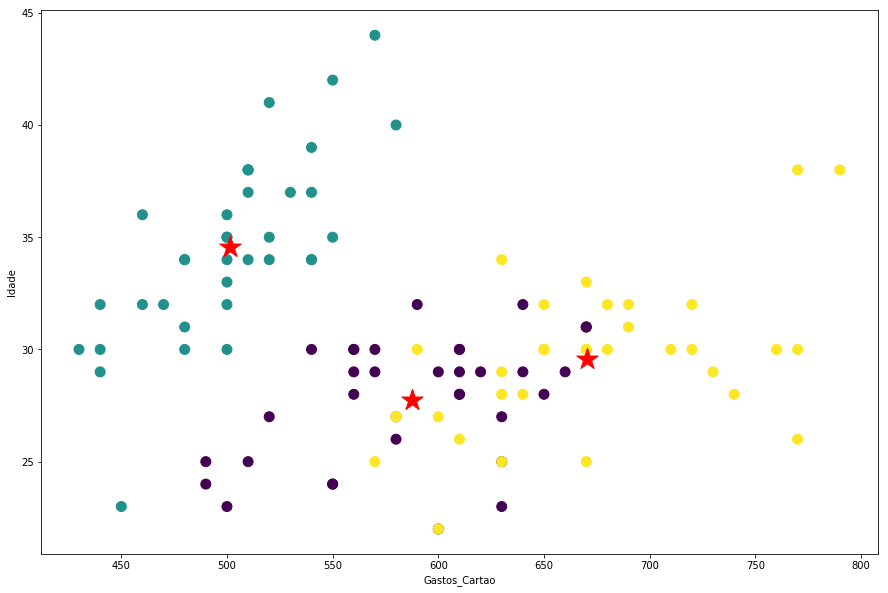

In [159]:
f1 = df_train['Gastos_Cartao'].values
f2 = df_train['Idade'].values

plt.figure(figsize=(15,10))
plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c="red", s=500)
plt.xlabel('Gastos_Cartao')
plt.ylabel('Idade')
plt.show()

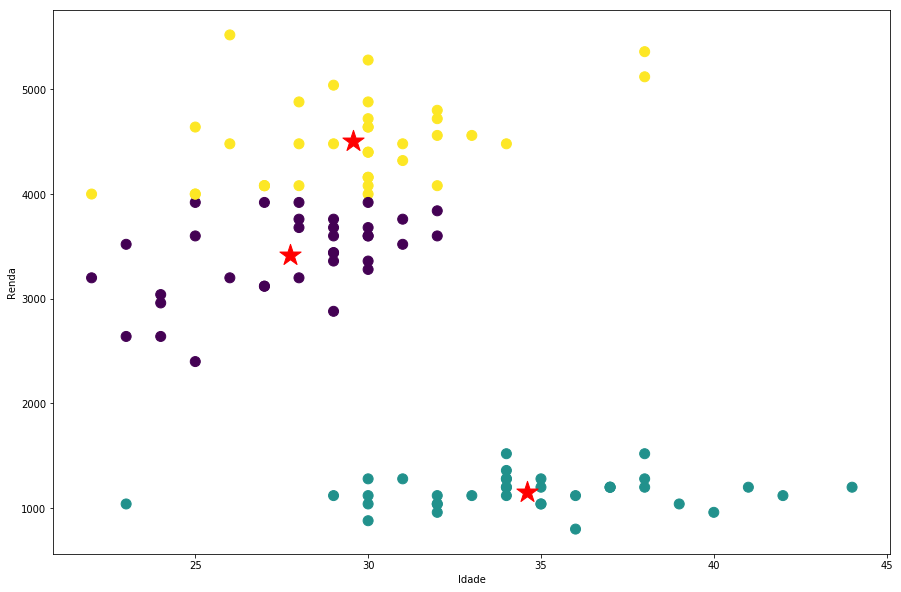

In [160]:
f1 = df_train['Idade'].values
f2 = df_train['Renda'].values

plt.figure(figsize=(15,10))
plt.scatter(f1, f2, c=labels, s=100)
plt.scatter(centers[:, 1], centers[:, 2], marker='*', c="red", s=500)
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

In [161]:
labels = km.predict(df_val[colunas])

In [162]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_val.index.values
cluster_map['cluster'] = labels
cluster_map[cluster_map["cluster"] == 1]

,data_index,cluster
0,0,1
3,17,1
4,23,1
6,1,1
10,37,1
14,7,1
20,6,1
26,18,1
27,45,1
29,5,1


In [163]:
df_val[df_val["Segmento"] == 'C']

,Gastos_Cartao,Idade,Renda,Impostos,Segmento
0,510,35,1120,60,C
17,510,35,1120,90,C
23,510,33,1360,150,C
1,490,30,1120,60,C
37,490,36,1120,30,C
7,500,34,1200,60,C
6,460,34,1120,90,C
18,570,38,1360,90,C
45,480,30,1120,90,C
5,540,39,1360,120,C
